CAR PRICE PREDICTION WITH MACHINE LEARNING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
dataset.shape

(205, 26)

In [5]:
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
dataset = dataset.select_dtypes(include =['int64','float64'])
dataset

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
dataset = dataset.drop(['car_ID','symboling'],axis = 1)
dataset.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
dataset.shape

(205, 14)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 22.5 KB


In [13]:
dataset.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [14]:
dataset.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


In [15]:
x = dataset.iloc[:,0:13].values
y = dataset.iloc[:,-1].values

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'CAR PRICE DISTRIBUTION PLOT'}, xlabel='price', ylabel='Density'>

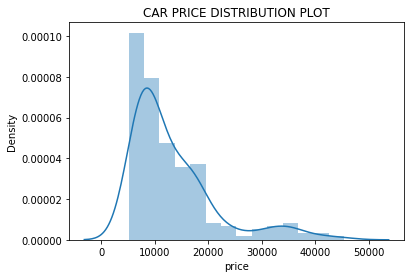

In [16]:
#data visualization 
plt.title('CAR PRICE DISTRIBUTION PLOT')
sns.distplot(dataset['price'])

<AxesSubplot:title={'center':'CAR PRICE SPREAD'}, ylabel='price'>

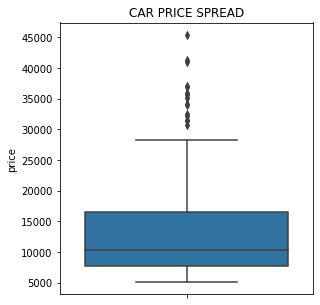

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('CAR PRICE SPREAD')
sns.boxplot(y=dataset.price)

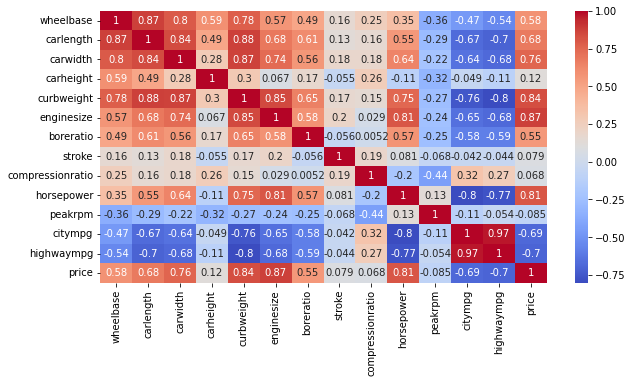

In [18]:
plt.figure(figsize=(10, 5))
correlations = dataset.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
regressor = DecisionTreeRegressor()
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [21]:
print(x_train.shape)
print(x_test.shape)

(153, 13)
(52, 13)


In [22]:
x_test

array([[9.310e+01, 1.591e+02, 6.420e+01, 5.410e+01, 1.905e+03, 9.100e+01,
        3.030e+00, 3.150e+00, 9.000e+00, 6.800e+01, 5.000e+03, 3.100e+01,
        3.800e+01],
       [1.045e+02, 1.878e+02, 6.650e+01, 5.410e+01, 3.151e+03, 1.610e+02,
        3.270e+00, 3.350e+00, 9.200e+00, 1.560e+02, 5.200e+03, 1.900e+01,
        2.400e+01],
       [9.980e+01, 1.773e+02, 6.630e+01, 5.310e+01, 2.507e+03, 1.360e+02,
        3.190e+00, 3.400e+00, 8.500e+00, 1.100e+02, 5.500e+03, 1.900e+01,
        2.500e+01],
       [8.840e+01, 1.411e+02, 6.030e+01, 5.320e+01, 1.488e+03, 6.100e+01,
        2.910e+00, 3.030e+00, 9.500e+00, 4.800e+01, 5.100e+03, 4.700e+01,
        5.300e+01],
       [9.730e+01, 1.717e+02, 6.550e+01, 5.570e+01, 2.300e+03, 1.090e+02,
        3.190e+00, 3.400e+00, 1.000e+01, 1.000e+02, 5.500e+03, 2.600e+01,
        3.200e+01],
       [9.840e+01, 1.762e+02, 6.560e+01, 5.200e+01, 2.679e+03, 1.460e+02,
        3.620e+00, 3.500e+00, 9.300e+00, 1.160e+02, 4.800e+03, 2.400e+01,
        3.00

In [23]:
regressor.fit(x_train,y_train)
     

DecisionTreeRegressor()

In [24]:
y_pred = regressor.predict(x_test)

In [25]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred    
})

In [26]:
result.head()

,actual,predicted
0,6795.0,6095.0
1,15750.0,16500.0
2,15250.0,13950.0
3,5151.0,5399.0
4,9995.0,9960.0


In [27]:
new = [[93.7,157.3,63.8,50.6,1967,90,2.97,3.230,9.40,68,5500,31,38]]
regressor.predict(new)[0]

6229.0

In [28]:
new2 = [[102,191.7,70.6,47.8,3950,326,3.54,2.76,11.5,262,5000,13,17]]
regressor.predict(new2)[0]
     

36000.0

In [29]:
new3 = [[103.3,174.6,64.6,59.8,2535,122,3.35,3.46,8.50,88,5000,24,30]]
regressor.predict(new3)[0]

8921.0

In [30]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [31]:
r2_score(y_test,y_pred)

0.8591648254269313

In [32]:
mean_absolute_error(y_test,y_pred)

2177.471153846154

In [33]:
mean_squared_error(y_test,y_pred)

10501801.014423076

TRAINING AND TESTING THE MODEL

In [34]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [35]:
print(x_train.shape)
print(x_test.shape)

(153, 13)
(52, 13)


USING LINEAR REGRESSION

In [36]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [37]:
y_pred = model.predict(x_test)
y_pred

array([ 6235.42500602, 19790.61817546, 14979.27612129, -1134.1351902 ,
       11132.32548236, 13518.17757352,  5683.20921384,  6283.89365797,
       23126.98530885,  8202.87829636, 16141.08746789, 37186.620833  ,
        9399.71398237, 14235.89743835,  5757.94201887, 13165.16702932,
       11152.82221655, 18568.63307141, 10141.86686901,  6287.15927099,
       10682.51479525, 17992.19878976, 10833.41323372, 13614.7038942 ,
       21454.99910165,  8202.97012341,  6873.2042475 , 17805.91105615,
        6902.39516583,  5801.50097042,  9649.90265499, 11070.09789029,
       21045.77815857,  8246.11235138,  5936.63781937, 26615.14377318,
       10378.97946806, 16778.39190457,  6689.66441559, 37043.76928874,
        5661.41569819, 15623.82529796, 30395.98293889, 17901.79311012,
       11439.71150878,  7274.32045138,  6977.32359472, 15485.01565233,
       10277.75067436,  9831.92371684, 18843.28365874,  6807.29317223])

In [38]:
y_test

array([ 6795. , 15750. , 15250. ,  5151. ,  9995. , 11199. ,  5389. ,
        7898. , 17199. ,  6529. , 20970. , 31400.5, 10945. , 18344. ,
        8916.5,  9989. ,  9295. , 18920. ,  7895. ,  6488. ,  9959. ,
       15580. ,  9895. , 11549. , 15998. ,  5118. ,  6938. , 16695. ,
        8358. ,  5499. ,  7975. , 12290. , 22018. ,  8948. ,  6849. ,
       41315. , 11595. , 18150. ,  6377. , 45400. ,  8916.5, 17450. ,
       34184. , 15040. , 11259. ,  7609. ,  7609. , 14869. , 11694. ,
        8495. , 23875. ,  7099. ])

In [39]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
0,6795.0,6235.425006
1,15750.0,19790.618175
2,15250.0,14979.276121
3,5151.0,-1134.135190
4,9995.0,11132.325482
5,11199.0,13518.177574
6,5389.0,5683.209214
7,7898.0,6283.893658
8,17199.0,23126.985309
9,6529.0,8202.878296


<AxesSubplot:>

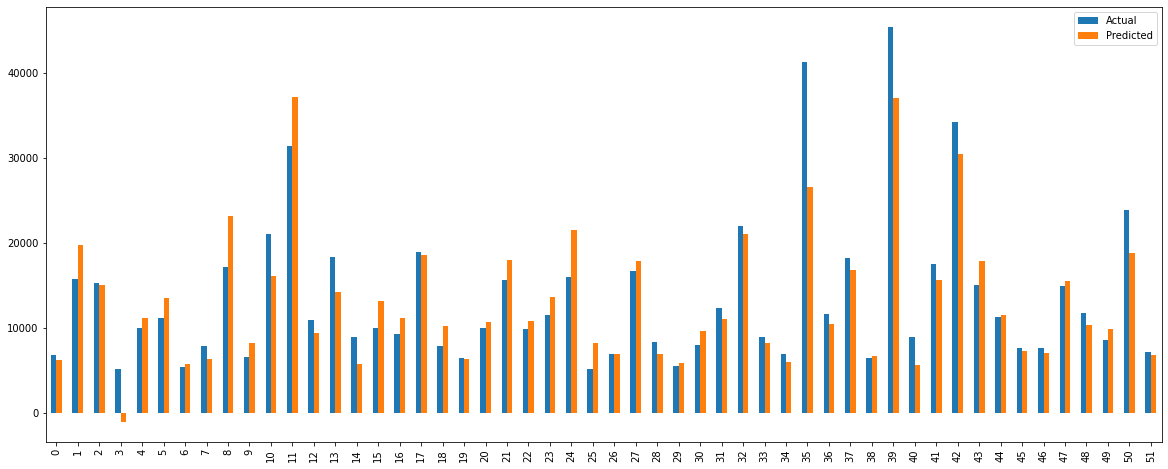

In [40]:
df1.plot(figsize=(20,8),kind = 'bar')

<AxesSubplot:>

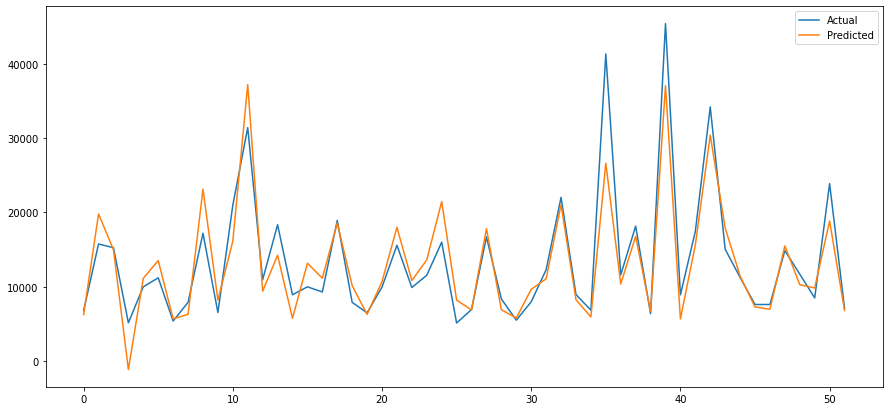

In [41]:
df1.plot(figsize=(15,7))

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

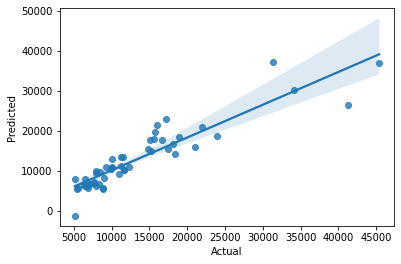

In [42]:
sns.regplot(x='Actual',y='Predicted',data=df1)

In [43]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
r2_score(y_test,y_pred)

0.8387970914426265

In [44]:
mean_absolute_error(y_test,y_pred)

2346.2845312032778

In [45]:
mean_squared_error(y_test,y_pred)

12020582.739700777